In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import SVC
#import warnings
#warnings.filterwarnings('ignore')
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
#import imblearn

from scipy import stats

from graphviz import Source
from sklearn import tree
from IPython.display import Image
from IPython.display import SVG
import os

red_wine = pd.read_csv('winequality-red.csv', sep = ';')
white_wine = pd.read_csv('winequality-white.csv', sep = ';')

# create a new variable 'wine_type'
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'


# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

wines = pd.concat([red_wine, white_wine])

In [31]:
wqp_features = wines.iloc[:,:-3]
wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = ['low', 'medium', 'high']
wqp_feature_names = list(wqp_features.columns)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features, wqp_class_labels, test_size=0.3, random_state=42)

print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)

Counter({'medium': 2706, 'low': 1693, 'high': 148}) Counter({'medium': 1209, 'low': 691, 'high': 50})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [8]:
wqp_features_red = red_wine.iloc[:,:-3]
wqp_class_labels_red = np.array(red_wine['quality_label'])
wqp_label_names = ['low', 'medium', 'high']
wqp_feature_red_names = list(wqp_features_red.columns)
wqp_train_red_X, wqp_test_red_X, wqp_train_red_y, wqp_test_red_y = train_test_split(wqp_features_red, wqp_class_labels_red, test_size=0.3, random_state=42)

print(Counter(wqp_train_red_y), Counter(wqp_test_red_y))
print('Features:', wqp_feature_red_names)

Counter({'medium': 576, 'low': 531, 'high': 12}) Counter({'medium': 261, 'low': 213, 'high': 6})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [9]:
wqp_features_white = white_wine.iloc[:,:-3]
wqp_class_labels_white = np.array(white_wine['quality_label'])
wqp_label_names = ['low', 'medium', 'high']
wqp_feature_white_names = list(wqp_features_white.columns)
wqp_train_white_X, wqp_test_white_X, wqp_train_white_y, wqp_test_white_y = train_test_split(wqp_features_white, wqp_class_labels_white, test_size=0.3, random_state=42)

print(Counter(wqp_train_white_y), Counter(wqp_test_white_y))
print('Features:', wqp_feature_white_names)

Counter({'medium': 2130, 'low': 1167, 'high': 131}) Counter({'medium': 948, 'low': 473, 'high': 49})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [11]:
wqp_features.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [12]:
wqp_features_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


In [13]:
wqp_features_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [22]:
# Define the scaler. The scaler is best used for a normal distribution of values. Should distributions be very skewed, the MinMaxScaler could be a better candidate.
wqp_ss = StandardScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

In [14]:
# Define the scaler. The scaler is best used for a normal distribution of values. Should distributions be very skewed, the MinMaxScaler could be a better candidate.
wqp_ss_red = StandardScaler().fit(wqp_train_red_X)
# Scale the train set
wqp_train_SX_red = wqp_ss_red.transform(wqp_train_red_X)
# Scale the test set
wqp_test_SX_red = wqp_ss_red.transform(wqp_test_red_X)

In [15]:
# Define the scaler. The scaler is best used for a normal distribution of values. Should distributions be very skewed, the MinMaxScaler could be a better candidate.
wqp_ss_white = StandardScaler().fit(wqp_train_white_X)
# Scale the train set
wqp_train_SX_white = wqp_ss_white.transform(wqp_train_white_X)
# Scale the test set
wqp_test_SX_white = wqp_ss_white.transform(wqp_test_white_X)

In [23]:
# train the model
wqp_dt = DecisionTreeClassifier()
wqp_dt.fit(wqp_train_SX, wqp_train_y)

# predict and evaluate performance
wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_dt_predictions, target_names=wqp_label_names))


              precision    recall  f1-score   support

         low       0.27      0.36      0.31        50
      medium       0.67      0.68      0.68       691
        high       0.80      0.78      0.79      1209

    accuracy                           0.73      1950
   macro avg       0.58      0.61      0.59      1950
weighted avg       0.74      0.73      0.73      1950



In [16]:
# train the model
wqp_dt_red = DecisionTreeClassifier()
wqp_dt_red.fit(wqp_train_SX_red, wqp_train_red_y)

# predict and evaluate performance
wqp_dt_predictions_red = wqp_dt_red.predict(wqp_test_SX_red)

print(classification_report(wqp_test_red_y,wqp_dt_predictions_red, target_names=wqp_label_names))


              precision    recall  f1-score   support

         low       0.25      0.17      0.20         6
      medium       0.72      0.68      0.70       213
        high       0.74      0.77      0.76       261

    accuracy                           0.73       480
   macro avg       0.57      0.54      0.55       480
weighted avg       0.72      0.72      0.72       480



In [17]:
# train the model
wqp_dt_white = DecisionTreeClassifier()
wqp_dt_white.fit(wqp_train_SX_white, wqp_train_white_y)

# predict and evaluate performance
wqp_dt_predictions_white = wqp_dt_white.predict(wqp_test_SX_white)

print(classification_report(wqp_test_white_y,wqp_dt_predictions_white, target_names=wqp_label_names))


              precision    recall  f1-score   support

         low       0.34      0.49      0.40        49
      medium       0.65      0.66      0.65       473
        high       0.81      0.78      0.80       948

    accuracy                           0.73      1470
   macro avg       0.60      0.64      0.62      1470
weighted avg       0.74      0.73      0.74      1470



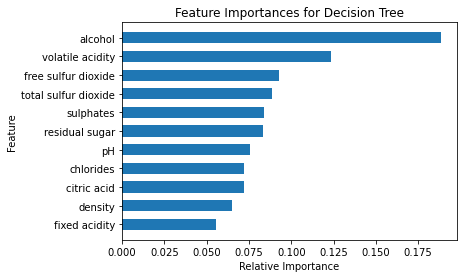

In [48]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names,wqp_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

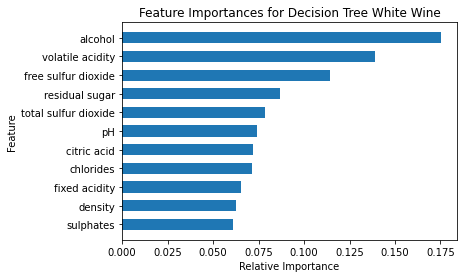

In [18]:
wqp_dt_white_feature_importances = wqp_dt_white.feature_importances_
wqp_dt_white_feature_names, wqp_dt_white_feature_scores = zip(*sorted(zip(wqp_feature_white_names,wqp_dt_white_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_white_feature_names)))
plt.barh(y_position, wqp_dt_white_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_white_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree White Wine')

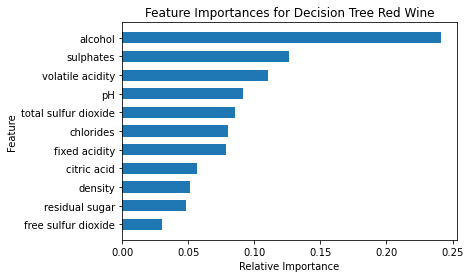

In [19]:
wqp_dt_red_feature_importances = wqp_dt_red.feature_importances_
wqp_dt_red_feature_names, wqp_dt_red_feature_scores = zip(*sorted(zip(wqp_feature_red_names,wqp_dt_red_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_red_feature_names)))
plt.barh(y_position, wqp_dt_red_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_red_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree Red Wine')

In [29]:
#import graphviz
graph = Source(tree.export_graphviz(wqp_dt, out_file=None, class_names=wqp_label_names, filled=True, rounded=True, special_characters=False, feature_names=wqp_feature_names, max_depth=3))
#Source( tree.export_graphviz(dtreg, out_file=None, feature_names=X.columns))
#graph
#graph.write_png('xyz.png')
#SVG(graph.pipe(format='svg'))
#graph.format = 'png'
#graph.render('dtree_render',view=True)
#png_data = graph.pipe(format='png')
#with open('dtree_render','wb') as f:
#    f.write(png_data)
#Image(graph)
#Source(tree.export_graphviz(wqp_dt, out_file=None, class_names=wqp_label_names, filled=True, rounded=True, special_characters=False, feature_names=wqp_feature_names, max_depth=3))

In [32]:
# train the model
wqp_rf = RandomForestClassifier()
wqp_rf.fit(wqp_train_SX, wqp_train_y)
# predict and evaluate performance
wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_rf_predictions, target_names=wqp_label_names))

              precision    recall  f1-score   support

         low       0.88      0.30      0.45        50
      medium       0.75      0.75      0.75       691
        high       0.83      0.86      0.84      1209

    accuracy                           0.80      1950
   macro avg       0.82      0.63      0.68      1950
weighted avg       0.80      0.80      0.80      1950



<AxesSubplot:>

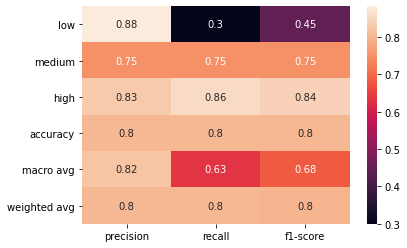

In [55]:
clf_report = classification_report(wqp_test_y,wqp_rf_predictions, target_names=wqp_label_names, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)


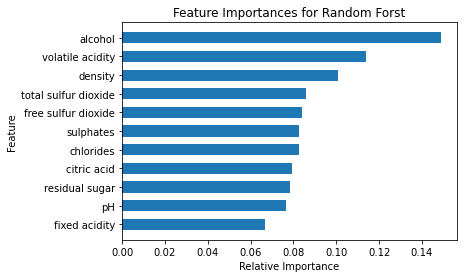

In [44]:
wqp_rf_feature_importances = wqp_rf.feature_importances_
wqp_rf_feature_names, wqp_rf_feature_scores = zip(*sorted(zip(wqp_feature_names,wqp_rf_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_rf_feature_names)))
plt.barh(y_position, wqp_rf_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_rf_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t5 = plt.title('Feature Importances for Random Forst')

In [33]:
# train the model
wqp_rf_white = RandomForestClassifier()
wqp_rf_white.fit(wqp_train_SX_white, wqp_train_white_y)
# predict and evaluate performance
wqp_rf_predictions_white = wqp_rf_white.predict(wqp_test_SX_white)

print(classification_report(wqp_test_white_y,wqp_rf_predictions_white, target_names=wqp_label_names))

              precision    recall  f1-score   support

         low       1.00      0.37      0.54        49
      medium       0.75      0.71      0.73       473
        high       0.83      0.88      0.86       948

    accuracy                           0.81      1470
   macro avg       0.86      0.65      0.71      1470
weighted avg       0.81      0.81      0.81      1470



<AxesSubplot:>

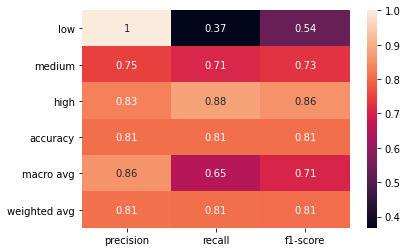

In [56]:
clf_report_white = classification_report(wqp_test_white_y,wqp_rf_predictions_white, target_names=wqp_label_names, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_white).iloc[:-1, :].T, annot=True)


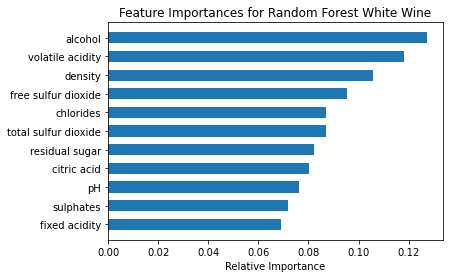

In [51]:
wqp_rf_white_feature_importances = wqp_rf_white.feature_importances_
wqp_rf_white_feature_names, wqp_rf_white_feature_scores = zip(*sorted(zip(wqp_feature_white_names,wqp_rf_white_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_rf_white_feature_names)))
plt.barh(y_position, wqp_rf_white_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_rf_white_feature_names)
plt.xlabel('Relative Importance')
#plt.ylabel('Feature')
t6 = plt.title('Feature Importances for Random Forest White Wine')

In [52]:
# train the model
wqp_rf_red = RandomForestClassifier()
wqp_rf_red.fit(wqp_train_SX_red, wqp_train_red_y)
# predict and evaluate performance
wqp_rf_predictions_red = wqp_rf_red.predict(wqp_test_SX_red)

print(classification_report(wqp_test_red_y,wqp_rf_predictions_red, target_names=wqp_label_names))

              precision    recall  f1-score   support

         low       0.50      0.17      0.25         6
      medium       0.78      0.75      0.77       213
        high       0.79      0.83      0.81       261

    accuracy                           0.79       480
   macro avg       0.69      0.58      0.61       480
weighted avg       0.78      0.79      0.78       480



<AxesSubplot:>

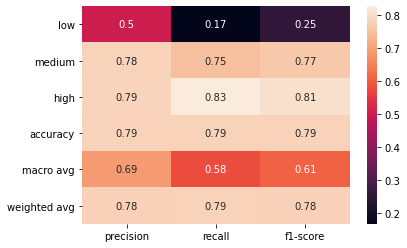

In [57]:
clf_report_red = classification_report(wqp_test_red_y,wqp_rf_predictions_red, target_names=wqp_label_names, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_red).iloc[:-1, :].T, annot=True)

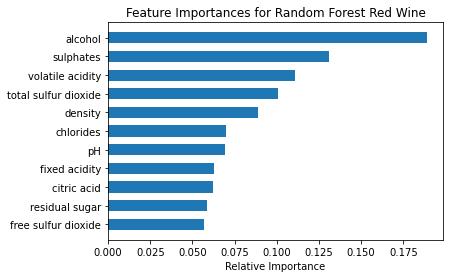

In [53]:
wqp_rf_red_feature_importances = wqp_rf_red.feature_importances_
wqp_rf_red_feature_names, wqp_rf_red_feature_scores = zip(*sorted(zip(wqp_feature_red_names,wqp_rf_red_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_rf_red_feature_names)))
plt.barh(y_position, wqp_rf_red_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_rf_red_feature_names)
plt.xlabel('Relative Importance')
#plt.ylabel('Feature')
t6 = plt.title('Feature Importances for Random Forest Red Wine')

In [41]:
#sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)
#wqp_svm = SVC()
wqp_svm = svm.LinearSVC(random_state=20)
# fit the model with the training data

# Everything has to be numpy...
# wtp_class_labels = np.array(wines['wine_type'])
wqp_train_SX_np = np.array(wqp_train_SX)
wqp_train_y_np = np.array(wqp_train_y)

wqp_svm.fit(wqp_train_SX_np, wqp_train_y_np)

# predict the target on the train dataset
wqp_svm_predictions = wqp_svm.predict(wqp_train_SX_np)
#print(classification_report(wqp_test_y, wqp_svm_predictions, target_names=wqp_label_names))
accuracy_score(wqp_test_y, wqp_svm_predictions)
#score=accuracy_score(test_y,predicted)
#print("Your Model Accuracy is", score)

ValueError: Found input variables with inconsistent numbers of samples: [1950, 4547]

In [49]:
pwd()

'c:\\Users\\HP\\Documents\\GIT\\antelope\\antelope'